In [2]:
from scipy.io import loadmat
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
from numpy.fft import fft
import pandas as pd
import os
figure_size = (6,4)

folderpath = "Measurement\Data\VortexUden"
coefficients = np.loadtxt('polynomial_coefficients.txt')


first = True
for filename in os.listdir(folderpath):
    if filename.endswith(".csv"):
        filepath = os.path.join(folderpath, filename)
        df = pd.read_csv(filepath)
        V = df.iloc[:, 1].values
        u_temp = np.polyval(coefficients, V)
        
        if first:
            u = u_temp
            first = False
        else:
            u = np.vstack((u,u_temp))


u = np.transpose(u)

n, nblock =  np.shape(u)

dt = df.iloc[1, 0] - df.iloc[0, 0]
fs = 1 / dt

print(nblock)

400


**Means over all the blocks**

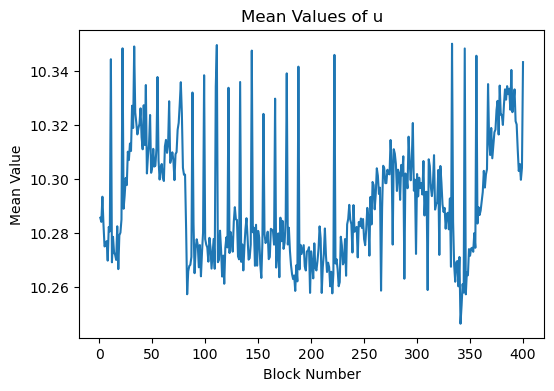

In [3]:
all_means = np.mean(u[:,:],axis=0)
plt.figure(figsize=figure_size)  # Set the size of the graph
plt.plot(range(1,nblock+1),all_means)
plt.title('Mean Values of u')
plt.xlabel('Block Number')
plt.ylabel('Mean Value')
plt.show()


In [4]:
uf = u - u.mean() # fluctuation part
all_autocorr = np.zeros((n, nblock))



for i in range(nblock):
    temp = np.correlate(uf[:,i], uf[:,i], mode='full') / n
    all_autocorr[:,i] = temp[n-1:] / temp.max()   

plt.figure(figsize=figure_size)  # Set the size of the graph
plt.semilogx( np.arange(n)*dt,np.mean(all_autocorr,axis=1))
plt.axhline(y=0, color='r', linestyle='--')  # Add a line at y=0
plt.title('Autocorrelation of u Fluctuations')
plt.xlabel('Time (s)')
plt.ylabel('Autocorrelation')
plt.show()

integral = np.trapz(np.mean(all_autocorr, axis=1), np.arange(n)*dt)
print("Integral under the plot:", integral)



KeyboardInterrupt: 

**Spectral plot**

In [ ]:
plt.figure(figsize=figure_size)
f = np.arange(n) / (n * dt)
spectrum_blocks = np.zeros((n, nblock))
for i in range(nblock):
    uft = dt * fft(uf[:,i])
    s = uft * uft.conjugate() / (n * dt)
    spectrum_blocks[:,i] = s.real
spectrum = spectrum_blocks.mean(1)
plt.loglog(f[1:n//2], spectrum_blocks[1:n//2,0], linewidth=0.5, label='single block')
plt.loglog(f[1:n//2], spectrum[1:n//2], '-k', label='block averaged')
plt.xlabel('f [Hz]')
plt.ylabel(u'S [m$^2$/s]')
plt.title('Spectral Plot')
plt.grid()

plt.axvline(x=200, color='k', linestyle='--', label='200 Hz', alpha=0.5)
plt.axvline(x=400, color='k', linestyle='-.', label='400 Hz', alpha=0.5)
plt.axvline(x=800, color='k', linestyle=':', label='800 Hz', alpha=0.5)

plt.legend()
plt.ylim(1e-10,1)

plt.show()




NameError: name 'plt' is not defined